<h1><center>Fuel Consumption Analysis by Simple & Multiple & Polynomial Regression</center></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#data_exploration">Data Exploration</a></li>
        <li><a href="#simple_regression">Simple Regression Model</a></li>
        <li><a href="#Multiple_regression">Multiple Regression Model</a></li>
        <li><a href="#Polynomial_regression">Polynomial Regression Model</a></li>
    </ol>
</div>
<br>
<hr>

## Importing Packages

In [3]:
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import pandas as pd 
%matplotlib inline

## Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.

In [4]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-06-01 10:30:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-06-01 10:30:28 (1.69 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Exploring Data

In [5]:
df = pd.read_csv('FuelConsumption.csv')

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.

In [8]:
viz = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


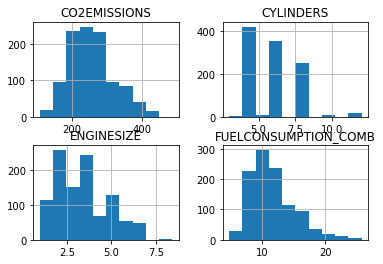

In [9]:
viz.hist()
plt.show()

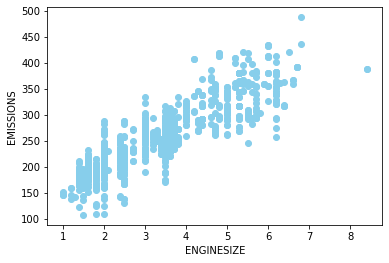

In [10]:
plt.scatter(viz.ENGINESIZE,viz.CO2EMISSIONS, color = 'skyblue')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show()

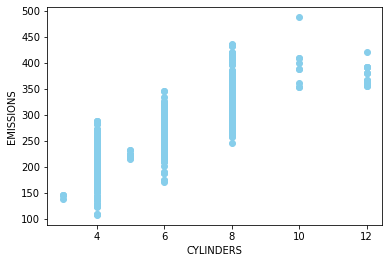

In [11]:
plt.scatter(viz.CYLINDERS,viz.CO2EMISSIONS, color = 'skyblue')
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSIONS")
plt.show()

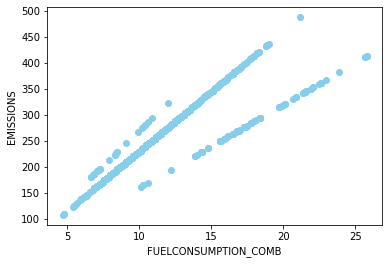

In [12]:
plt.scatter(viz.FUELCONSUMPTION_COMB,viz.CO2EMISSIONS, color = 'skyblue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSIONS")
plt.show()

## Simple Linear Model

## Creating train and test dataset

In [13]:
mask = np.random.rand(len(df)) < 0.8
train = viz[mask]
test = viz[~mask]

#### Train data distribution

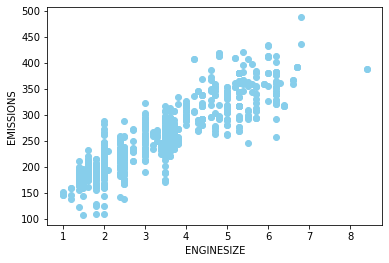

In [14]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color = 'skyblue')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show()

#### Modeling
Using sklearn package to model data.

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x,train_y )

# The coefficients
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [[39.45316934]]
Intercept:  [124.38320281]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.

#### Plot outputs
we can plot the fit line over the data:

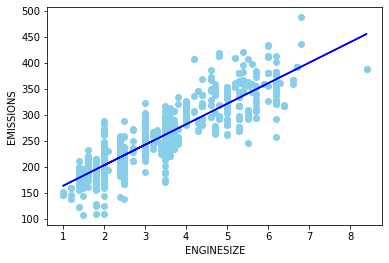

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'skyblue')
plt.plot(train_x, regr.coef_[0][0]*train_x+ regr.intercept_[0], '-b')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show()

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [17]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual Sum of Squares (MSE): %.2f" % np.mean((test_y_hat - test_y) **2))
print("R2-score: %.2f" % r2_score(test_y_hat, test_y) )

Mean Absolute Error: 23.06
Residual Sum of Squares (MSE): 929.93
R2-score: 0.71


## 2 Multiple Regression Model

In [18]:
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y )

# The coefficients
print("Coefficients: ", regr.coef_)

Coefficients:  [[11.18934844  7.26483683  9.57225494]]


#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

<h2 id="prediction">Prediction</h2>

In [19]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
print("Residual Sum of Squares: %.2f" % np.mean((y_hat - y)**2))
# Explained variance score: 1 is perfect prediction
print("Variance Score: %.2f" % regr.score(x,y))

Residual Sum of Squares: 559.60
Variance Score: 0.85


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

## 3 Polynomial Regression Model

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [20]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 



so we can use __LinearRegression()__ function to solve it:

In [43]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly,train_y)
# The coefficient
print("Coefficient: ", clf.coef_)
print("Intercept: ", clf.intercept_)

Coefficient:  [[ 0.         51.74806446 -1.63149123]]
Intercept:  [104.80549212]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

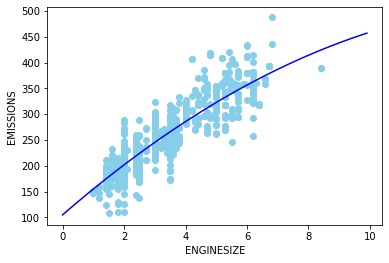

In [44]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'skyblue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-b')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show()

## Evaluation

In [45]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_hat = clf.predict(test_x_poly)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error (MAE): 24.74
Residual sum of squares (MSE): 1022.55
R2-score: 0.66


In [35]:
poly3 = PolynomialFeatures(degree = 3)
train_x_poly3 = poly3.fit_transform(train_x)
train_x_poly3

clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3,train_y)
# The coefficient
print("Coefficients: ", clf3.coef_)
print("Intercept: ", clf3.intercept_)

Coefficients:  [[ 0.         26.71920602  5.21283407 -0.56329649]]
Intercept:  [131.56106828]


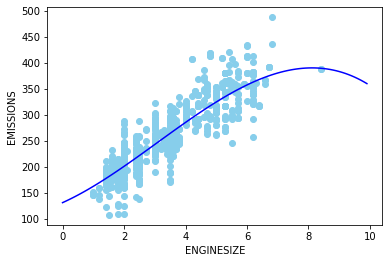

In [37]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'skyblue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)

plt.plot(XX, yy, '-b')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show()

In [39]:
## Evaluation

In [41]:
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_hat = clf3.predict(test_x_poly3)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y3_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_hat , test_y) )

Mean absolute error (MAE): 24.81
Residual sum of squares (MSE): 1027.72
R2-score: 0.66
